# Project: Wrangling and Analyzing Data


## Data Gathering

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import requests 
import os
import tweepy 
import glob
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Read the twitter_archive csv file
df_twitter = pd.read_csv('twitter-archive-enhanced.csv', na_values = ['None'])

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'Image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('Image_prediction', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
os.listdir('Image_prediction')

['image-predictions.tsv']

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy

    
consumer_key = 'xxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

2356

In [7]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [5]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

In [6]:
#tweet_json = pd.read_csv('tweet_json.txt',sep=',')
df_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    
for line in lines:
    d = json.loads(line) 
    tweet_id = d['id']
    retweet_count = d['retweet_count']
    favorite_count = d['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
df_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])           

In [7]:
df_tweets.to_csv('df_tweets.csv') 

In [8]:
df_images = pd.read_csv('/home/workspace/Image_prediction/image-predictions.tsv',sep='\t')

In [9]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Assessing Data


#### Quality issues
1. The timestamp column contains four zero digits at the end, as well as in the retweeted_status_timestamp column. 

2. Prepostitions such as 'a', 'an' and 'the' instead of names in name column. 

3. Rating denominator sometimes is not 10.

4. Datatype is object for timestamp,retweeted_status_timestamp instead of datetime. 

5. Datatype is float for status_id and user_ids columns instead of int.

6. Inaccurate numerator values (higher than 100 and 1000). 

7. Missing dog names (not extracted from the text) 

8. Datatype of dog 'stages' is object instead of category. 

#### Tidiness issues
1. Some rows have two values of dog 'stages'(i.e doggo and floofer) instead of one value. 

2. There are some duplicated rows.  

3. Dog 'stages' in four columns instead of one (doggo, floofer, puppo,pupper).  

4. Expanded_urls contains sometimes more than one value (duplicated urls). 

5. Merge the tables twitter, tweet_id and images together. 

6. Convert the right dog_breed from the prediction algorithm columns into a single new column 'dog_breed'. 

## Cleaning Data

In [10]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_images_clean = df_images.copy()
df_tweets_clean = df_tweets.copy()

### Issue #1:

#### Define:
Remove the four zeros at the end of each value in the timestamp and retweeted_status_timestamp columns.

#### Code

In [11]:
df_twitter_clean.timestamp = df_twitter_clean.timestamp.str.rstrip('+0000')
df_twitter_clean.retweeted_status_timestamp = df_twitter_clean.retweeted_status_timestamp.str.rstrip('+0000')

#### Test

In [12]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #2:

#### Define
Change the prepositions 'a', 'an' and 'the' into real names to be extracted from the text if possible else put None. 

#### Code

In [13]:
#Use query to return records that have preps 'a', 'an' and 'the' in name column
twitter_records_with_preps = df_twitter_clean.query('name in ["a","an","the"]')

In [14]:
#Create a function that takes text and keyword as arguments and return dog name
def extract_name(txt,keywrd):
    name = txt.split(keywrd,2)[1].split('.')[0]
    return name


In [15]:
#Extract the possible names from the texts to replace the prepositions
names = twitter_records_with_preps['text'].apply(lambda x: extract_name(x,'named') if x.find('named') != -1 else None)
df_twitter_clean.loc[names.index,'name'] = names

In [16]:
pd.set_option("display.max_colwidth", -1)

#### Test

In [17]:
#Should be empty
df_twitter_clean.query('name in ["a","an","the"]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Further Cleaning issue 2 
> As we extracted some other names from the text column, we had some that are valid but not accurate. ==>  We will need further cleaning for the names Johm and Jessiga to be replaced by John and Jessica

#### code

In [18]:
df_twitter_clean.name = df_twitter_clean.name.replace('Johm', 'John')
df_twitter_clean.name = df_twitter_clean.name.replace('Jessiga', 'Jessica')

#### test 

In [19]:
#sould be empty 
df_twitter_clean.query('name in ["Johm","Jessiga"]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3

#### Define:
Set the denominator to value 10.

#### code

In [20]:
df_twitter_clean.rating_denominator = 10

#### test 

In [21]:
df_twitter_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #4

#### define
Change the datatype object of timestamp,retweeted_status_timestamp to datetime

#### Code

In [22]:
df_twitter_clean['timestamp']= pd.to_datetime(df_twitter_clean['timestamp'])
df_twitter_clean['retweeted_status_timestamp']= pd.to_datetime(df_twitter_clean['retweeted_status_timestamp'])

#### test

In [23]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1561 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](

### Issue #5 

#### define
Change datatype float of status_id and user_id columns to integer

#### code

In [24]:
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id']
#as the conversion to int doesn't work on nan values, we replace them with 0 first. 
df_twitter_clean[cols] = df_twitter_clean[cols].fillna(0)
df_twitter_clean[cols] = df_twitter_clean[cols].astype(int)

#### test

In [25]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1561 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](2)

### Issue #6

#### define
Inaccurate numerator values (higher than 100 and 1000)

In [26]:
df_twitter_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

#### code

In [27]:
df_twitter_clean.query('rating_numerator > 20')[['text','rating_numerator']]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165


#### Further assessing and cleaning
> These are 25 records where rating_nemerator column has unusual values. They will be corrected to valid ones if possible. After assessing, we found three types of values: 
- Values that are wrongly extracted from the text: 960, 75(twice), 27, 50, 26   => Replace them with the correct values. 
- Ratings that were given collectively: 99/90 is a rating for 9 puppies which means each puppy has a rating of 11/10, 165/150 for 15 puppies => 11 for each, 204/170 for 17 puppies => 12 for each, 80/80 for 8 puppies => 10 for each, 45/50 for 5 puppies => 9 for each, 60/50 for five puppies => 12 for each and so on for 44/40, 143/130, 121/110, 144/120, 88/80, 
- Values that can not be corrected as they were given that way by the user (with no info provided to correct them ): 420 (twice),1776, 666, 182 => to be dropped. 

In [28]:
#Create a dictionary of all the replacements
d = {960:13, 75:10, 27:11, 50:11, 26:11, 99:11,165:11, 204:12, 80:10, 45:9, 60:12, 44:11, 143:11,121:11,144:12,88:11}
df_twitter_clean = df_twitter_clean.replace({'rating_numerator':d})

# drop the invalid rating_numerator values
df_twitter_clean.drop([188,189, 290, 433,516, 979, 2074], inplace = True)

#### test

In [29]:
df_twitter_clean.rating_numerator.value_counts()

12    561
11    473
10    464
13    352
9     159
8     102
7     55 
14    54 
5     37 
6     32 
3     19 
4     17 
2     9  
1     9  
0     2  
15    2  
17    1  
20    1  
Name: rating_numerator, dtype: int64

### Issue #7

#### define
Go through the None or invalid values of name column and extract the names from the text if possible, otherwise keep the value as None or drop the row. 

#### code

In [30]:
#Return rows that have none name values 
df_twitter_clean[df_twitter_clean['name'].isna()][['text','name']]

,text,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN
30,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN
32,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,NaN
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN
37,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN
41,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN


> Most of the None values refer to tweets that don't send dogs for rating. However, only one value (index 2287) can be replaced by the right name from the text. The other rows will be dropped. 
> We will proceed with this as following:

1. drop irrelevant rows where text is not sent for dog rating. 
2. return rows with nan value names and correct them if possible

In [31]:
#drop irrelevant rows 
Irr_rows = df_twitter_clean[df_twitter_clean["text"].str.contains
         ("We only rate dogs|we only rate dogs|please send dogs|please only send dogs|We rate dogs|only send")
                            ==True]
idx_Irr_rows = Irr_rows.index
df_twitter_clean.drop(idx_Irr_rows, inplace = True)

In [32]:
df_nan_name = df_twitter_clean[df_twitter_clean['name'].isna()][['text','name']]
df_nan_name

,text,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN
30,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN
32,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,NaN
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN
37,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN
41,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN
42,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,NaN


In [33]:
df_nan_name = df_nan_name[df_nan_name["text"].str.contains("his name|named|this is|called")==True][['text','name']]
df_nan_name

,text,name
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN
149,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN
204,"RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",NaN
349,"I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN
498,I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN
603,RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,NaN
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",NaN
893,No no no this is all wrong. The Walmart had to have run into the dog driving the car. 10/10 someone tell him it's ok\nhttps://t.co/fRaTGcj68A,NaN
1051,"For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",NaN
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN


In [34]:
#drop duplicated and irrelevant rows. 
df_nan_name.drop([349,893,1068,1111,1618,2269,2305],axis=0,inplace = True)
df_twitter_clean.drop([349,893,1068,1111,1618,2269,2305],axis=0,inplace = True) 

In [35]:
df_nan_name

,text,name
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN
149,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN
204,"RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",NaN
498,I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN
603,RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,NaN
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",NaN
1051,"For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",NaN
1401,I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi,NaN
1842,&amp; this is Yoshi. Another world record contender 11/10 (what the hell is happening why are there so many contenders?) https://t.co/QG708dDNH6,NaN
1890,This pup was carefully tossed to make it look like she's riding that horse. I have no words this is fabulous. 12/10 https://t.co/Bob33W4sfD,NaN


In [36]:
# create a list of name from the text
names = ['Howard','Pablo', 'Blue', 'Elf', 'Tickles','Bretagne','None', 'None', 'Yoshi','None','None','Zeus','Guss']

In [37]:
df_nan_name.index

Int64Index([35, 149, 204, 498, 603, 784, 1051, 1401, 1842, 1890, 2131, 2166,
            2227],
           dtype='int64')

In [38]:
df_twitter_clean.loc[df_nan_name.index,'name'] = names

In [39]:
# Extract name at index 2287
df_twitter_clean.loc[2287,"name"]="Deryl"

#### test

In [40]:
display(df_twitter_clean.loc[2287,'name'])
display(df_twitter_clean.loc[df_nan_name.index]['name'])

'Deryl'

35      Howard  
149     Pablo   
204     Blue    
498     Elf     
603     Tickles 
784     Bretagne
1051    None    
1401    None    
1842    Yoshi   
1890    None    
2131    None    
2166    Zeus    
2227    Guss    
Name: name, dtype: object

### Issue #1 & #2 Tidiness

#### define
Select the dogs where more than one dog stage is given, remove the wrong dog stage and keep the right one with referring to the text. 

In [41]:
df_twitter_clean.loc[((df_twitter_clean['doggo'] == 'doggo') & (df_twitter_clean['floofer'] == 'floofer')) | 
            ((df_twitter_clean['doggo'] == 'doggo') & (df_twitter_clean['pupper'] == 'pupper')) |
           ((df_twitter_clean['doggo'] == 'doggo') & (df_twitter_clean['puppo'] == 'puppo'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,0,0,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,0,0,NaT,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,doggo,NaN,NaN,puppo
460,817777686764523521,0,0,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",0,0,NaT,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,0,0,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,0,0,NaT,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",0,0,NaT,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,0,0,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,0,0,NaT,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,0,0,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,0,0,NaT,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,0,0,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",0,0,NaT,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,NaN,pupper,NaN
778,775898661951791106,0,0,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",733109485275860992,4196983835,2016-05-19 01:38:16,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,NaN,doggo,NaN,pupper,NaN
822,770093767776997377,0,0,2016-08-29 03:00:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,741067306818797568,4196983835,2016-06-10 00:39:48,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,NaN,pupper,NaN
889,759793422261743616,0,0,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo

> There are 13 records where more than one dog stage is given: 
* Index 191 is a puppo => remove 'doggo' stage. 
* Index 460 pupper instead of doggo
* Index 531: Burke pupper and Dexter doggo => row to be split 
* Index 565: doggo and pupper => row to be split 
* Index 575 : pupper => remove 'doggo'
* Index 705: doggo => remove 'pupper'
* Index 733: pupper and doggo => row to be split 
* Index 778: doggo and pupper => row to be split 
* Index 822: doggo ands pupper => row to be split 
* Index 889 : doggo and pupper => row to be split 
* Index 956 : no doggo nor pupper => row to be dropped 
* Index 1063: duplicate of 822
* Index 1113: duplicate of 778

#### code

In [42]:
# Create a numpy array of indexes where 'doggo' and 'pupper' will be removed and replaced by nan values. 
idx_doggo_to_remove = np.array([191, 460,531,575,733,822,956 ])
idx_pupper_to_remove = np.array([565,705,778,889,956])
df_twitter_clean.loc[idx_doggo_to_remove,"doggo"]= np.nan
df_twitter_clean.loc[idx_pupper_to_remove,"pupper"]= np.nan

In [43]:
# Split (duplicate) rows that have two values of dog 'stages' into two rows using append
rows_to_split_idx= np.array([531,565,733,778,822,889])
rows_to_split = df_twitter_clean.loc[rows_to_split_idx]

In [44]:
# drop the irrelevant and duplicated rows:
df_twitter_clean.drop([956,1063,1113], axis=0, inplace=True)

In [45]:
# append the rows to_be_split 
df_twitter_clean = df_twitter_clean.append(rows_to_split,ignore_index=True)

In [46]:
#show the appended rows
df_twitter_clean.tail(6)[['text','doggo','pupper']]

,text,doggo,pupper
2266,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,pupper
2267,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,NaN
2268,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,pupper
2269,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,NaN
2270,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
2271,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo,NaN


> Once the rows_to_split are appended, now, we need to go through them all and split the values for each row. In other words, correct the possible column values and keep the rest intact. 

In [47]:
# replace with the right dog stage in the appended rows
df_twitter_clean.loc[2266:2271,'doggo'] = ['doggo','None','Doggo','None','doggo','None']
df_twitter_clean.loc[2266:2271,'pupper'] = ['None','pupper','None','pupper','None','pupper']

In [48]:
# Correct the names with referring to the text if possible based on index   
df_twitter_clean.loc[531,"name"]= "Burke"
df_twitter_clean.loc[2266,"name"]= "Dexter"
df_twitter_clean.loc[2271,"name"]= "Lila"

#### test

In [49]:
#Should be empty 
df_twitter_clean.loc[((df_twitter_clean['doggo'] == 'doggo') & (df_twitter_clean['floofer'] == 'floofer')) | 
            ((df_twitter_clean['doggo'] == 'doggo') & (df_twitter_clean['pupper'] == 'pupper')) |
           ((df_twitter_clean['doggo'] == 'doggo') & (df_twitter_clean['puppo'] == 'puppo'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3 Tidiness

#### define
Convert the *doggo*, *floofer*, *pupper* and *puppo* columns to a *'dog_stage'* single column. We will use the ffill function in ordr to regroup all dog 'stages'in one column. 

In [50]:
# We replace the values 'None'in the doggo, floofer, pupper and puppo columns with Nan which is recognized by pandas
df_twitter_clean['doggo'].replace("None", np.nan, inplace=True)
df_twitter_clean['floofer'].replace("None", np.nan, inplace=True)
df_twitter_clean['pupper'].replace("None", np.nan, inplace=True)
df_twitter_clean['puppo'].replace("None", np.nan, inplace=True)

In [51]:
#Create a new column 'dog_stage' and drop the doggo, floofer, pupper and puppo columns. 
df_twitter_clean['dog_stage'] = df_twitter_clean.loc[:,['doggo','floofer','pupper','puppo']].ffill(axis=1).iloc[:,-1]

In [52]:
# Now, we drop the 'doggo', 'floofer', 'pupper' and 'puppo' columns
df_twitter_clean = df_twitter_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1)

#### test

In [53]:
display(df_twitter_clean.head())
display(df_twitter_clean['dog_stage'].value_counts())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,0,0,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",0,0,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,0,0,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,0,0,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",0,0,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


pupper     253
doggo      89 
puppo      30 
floofer    9  
Doggo      1  
Name: dog_stage, dtype: int64

### Issue #4 Tidiness

#### define
Remove the duplicated urls from 'Expanded_urls' column. The duplicated urls are separated with a ','. We will use the split function and keep only the first url in each cell.

#### code

In [54]:
df_twitter_clean.expanded_urls = df_twitter_clean.expanded_urls.str.split(',').str.get(0)

#### test

In [55]:
df_twitter_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1
5       https://twitter.com/dog_rates/status/891087950875897856/photo/1
6       https://gofundme.com/ydvmve-surgery-for-jax                    
7       https://twitter.com/dog_rates/status/890729181411237888/photo/1
8       https://twitter.com/dog_rates/status/890609185150312448/photo/1
9       https://twitter.com/dog_rates/status/890240255349198849/photo/1
10      https://twitter.com/dog_rates/status/890006608113172480/photo/1
11      https://twitter.com/dog_rates/status/889880896479866881/photo/1
12      https://twitter.com/dog_rates/status/889665388333682689/photo/1
13      https://twitter.com/dog_rates/status/889638837579907072/

### Issue #5 Tidiness

#### define
Merge the three dataframes into a single table and join them on the 'tweet_id' column

#### code

In [56]:
df_twitter_clean = df_tweets_clean.merge(df_twitter_clean, how = 'inner', on = 'tweet_id')

In [57]:
df_twitter_clean = df_twitter_clean.merge(df_images_clean, how = 'inner', on = 'tweet_id')

In [58]:
df_twitter_clean.shape

(1987, 27)

#### test

In [59]:
df_twitter_clean.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,6975,33709,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,0,0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,5276,29230,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",0,0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,3465,21981,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,0,0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7196,36805,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,0,0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,7721,35195,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",0,0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #6 Tidiness

#### define
At this stage, we will only keep the right dog breed (value ='True') predicted by p1, p2 and p3. If two algorithms or more returned True, the value with higher confidence will be kept. 
If all predictinos are false and dog_stage is a Nan value => the row will be dropped. 

#### code

In [60]:
# Return records that has no dog breed nor dog_stage and drop them 
idx_row_to_drop = df_twitter_clean[(df_twitter_clean['dog_stage'].isna()) & (df_twitter_clean['p1_dog'] == False) & 
          (df_twitter_clean['p2_dog'] == False) & (df_twitter_clean['p3_dog'] == False)].index
df_twitter_clean.drop(idx_row_to_drop, inplace=True)

In [61]:
#Now , we create a new column 'dog_breed' based on three conditions ; 
# create a list of our conditions
conditions = [
    (df_twitter_clean['p1_dog'] == True),
    (df_twitter_clean['p1_dog'] == False) & (df_twitter_clean['p2_dog'] == True),
    (df_twitter_clean['p1_dog'] == False) & (df_twitter_clean['p2_dog'] == False) & (df_twitter_clean['p3_dog'] == True)
    ]

# create a list of the values we want to assign for each condition
values = [df_twitter_clean['p1'], df_twitter_clean['p2'] , df_twitter_clean['p3']]

# create a new column and use np.select to assign values to it using our lists as arguments
df_twitter_clean['dog_breed'] = np.select(conditions, values)

#drop predctions' related columns
df_twitter_clean.drop(['p1', 'p2', 'p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis=1, inplace=True)

#### test

In [62]:
df_twitter_clean.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed
1,892177421306343426,5276,29230,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",0,0,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,3465,21981,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,0,0,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,7196,36805,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,0,0,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,7721,35195,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",0,0,NaT,https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
5,891087950875897856,2589,17753,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,0,0,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
df_twitter_clean.to_csv("twitter_archive_master.csv",index=False)  

## Analyzing and Visualizing Data

### Insights:
1. Check which dog breed is the most favorite based on 'favorite_count'. 

2. Is there a correlation between retweet_count and favorite_count ?

3. What's the 'dog_stage' and breed of dog that are highly rated (based on rating_numerator)

### Insight #1 
Find which breed is the most tweeted and retweeted. 

In [64]:
#read the data
df_master = pd.read_csv('twitter_archive_master.csv')

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
df_master.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed
0,892177421306343426,5276,29230,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",0,0,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
1,891815181378084864,3465,21981,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,0,0,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2,891689557279858688,7196,36805,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,0,0,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
3,891327558926688256,7721,35195,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",0,0,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
4,891087950875897856,2589,17753,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,0,0,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever


In [67]:
df_master.dog_breed.describe()

count     1727            
unique    114             
top       golden_retriever
freq      170             
Name: dog_breed, dtype: object

In [68]:
df_master.dog_breed.value_counts()[:5]

golden_retriever      170
Labrador_retriever    105
Chihuahua             92 
Pembroke              92 
pug                   62 
Name: dog_breed, dtype: int64

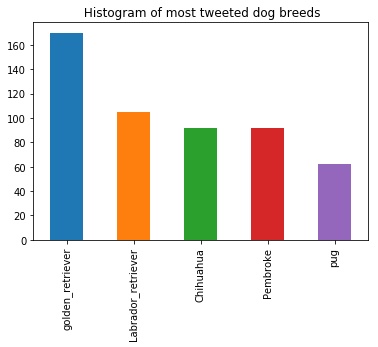

In [91]:
df_master.dog_breed.value_counts()[:5].plot(kind='bar', title = ' Histogram of most tweeted dog breeds')

> There are 114 dog breeds shared by the users and 'golden_retriever' is the most tweeted by users and 'Labrador_retiriever' comes in a second place.  The 'golden retriever' and 'Labrador_retriever' are to be known the most popular dog breeds in the united states and it is their friendly and tolerant attitude that makes them great family pets. Labradors are also known to be playful and easy to train.              
> Let's check in the following which one is the most retweeted. 

In [70]:
# sort the retweet_count column in a descending order
sorted_retweets = df_master.retweet_count.sort_values(ascending = False)[:10]
sorted_retweets

735     70365
760     52657
361     51452
267     39779
51      37285
289     34434
292     34434
364     32236
96      30068
1280    28470
Name: retweet_count, dtype: int64

In [71]:
df_master.loc[sorted_retweets.index,'dog_breed']

735     Labrador_retriever
760     Eskimo_dog        
361     Chihuahua         
267     Lakeland_terrier  
51      English_springer  
289     standard_poodle   
292     standard_poodle   
364     cocker_spaniel    
96      French_bulldog    
1280    Bedlington_terrier
Name: dog_breed, dtype: object

> Although the 'golden_retriever' is the most sent dog breed by users, the 'Labrador_retriever' is the one that caught all the attention and was the most retweeted, then comes 'Eskimo_dog' secondly and 'Chihuahua' in a third place. This is relatively expected as for the 29th year in a row, the Labrador retriever has emerged victorious as America's number one breed, according to a list [released](https://www.smithsonianmag.com/smart-news/labrador-tops-most-popular-dog-breed-list-29th-year-row-180974808/) by the American Kennel Club (AKC) on May 1. 

### Insight #2 
Is there a correlation between retweet count and favorite count ?

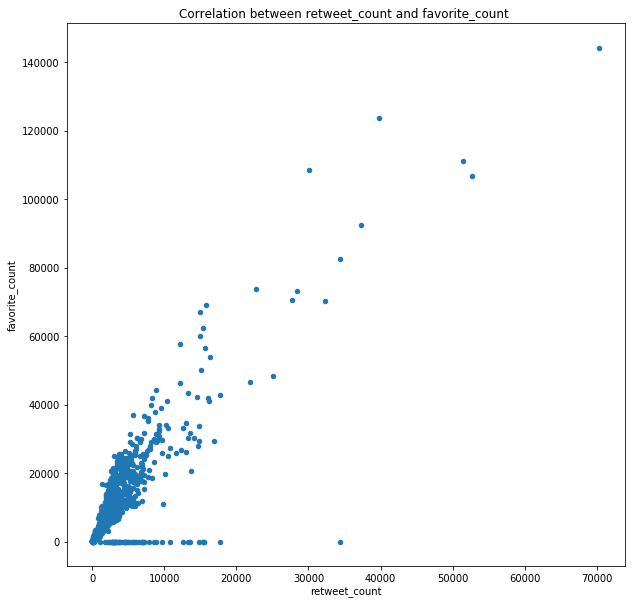

In [72]:
df_master.plot(x='retweet_count', y= 'favorite_count', kind = 'scatter',figsize=(10,10), 
               title = 'Correlation between retweet_count and favorite_count ');

> There is a positive correlation between retweet_count and favorite_count which means that generally users tend to retweet more their favorite images. We can also notice that although some images have high retweet counts (between 10000 and 20000), their favorite count remained null.  

### Insight #3
what's the dog stage/breed dog that takes the highest rating numerator ? => In order to achieve this result, we will sort the values of rating_numerator in a descending order and then return the dog_stage/dog_breed that has the highest rating. 

In [73]:
# Sort rating_numerator values and return their indices. 
sorted_rating = df_master.rating_numerator.sort_values(ascending=False)
sorted_rating[:20]

126    14
522    14
743    14
292    14
291    14
290    14
289    14
105    14
547    14
282    14
33     14
56     14
89     14
276    14
173    14
654    14
271    14
256    14
45     14
427    14
Name: rating_numerator, dtype: int64

In [74]:
# Return the most rated dog_stage
df_master.dog_stage.loc[sorted_rating.index][:20]

126    NaN   
522    NaN   
743    pupper
292    doggo 
291    doggo 
290    doggo 
289    doggo 
105    NaN   
547    NaN   
282    NaN   
33     NaN   
56     NaN   
89     NaN   
276    doggo 
173    NaN   
654    doggo 
271    pupper
256    puppo 
45     pupper
427    pupper
Name: dog_stage, dtype: object

> The pupper and doggo were in the top 20 of rated dog_stage with a rating of 14/10. It is quite logical that these stages take over 'puppo' and 'floofer' as they were the most sent by users.   

In [75]:
#return the most rated dog breed 
df_master.dog_breed.loc[sorted_rating.index][:20]

126    Old_English_sheepdog
522    Pembroke            
743    0                   
292    standard_poodle     
291    0                   
290    0                   
289    standard_poodle     
105    Lakeland_terrier    
547    Eskimo_dog          
282    Gordon_setter       
33     Pembroke            
56     French_bulldog      
89     French_bulldog      
276    Irish_setter        
173    Labrador_retriever  
654    0                   
271    Pomeranian          
256    Rottweiler          
45     Samoyed             
427    0                   
Name: dog_breed, dtype: object

> The *Old_English_sheepdog* was the highly rated breed with a score of 14/10 and then we had *Pembroke* in a second place. Surprisingly, *Golden retriver* was not among the top 20 rated breeds and *Labrador retriver* came only in the 15th place.  

### Visualization
Visualize the repartition of dog stages based on favorite_count and rating_numerator in average. 

In [76]:
# group the dataframe by 'dog_stage' and calculate the mean of favorite_count and rating_numerator
df_group = df_master.groupby(['dog_stage']).mean()[['favorite_count','rating_numerator']]
df_group

,favorite_count,rating_numerator
dog_stage,,
doggo,15708.704225,11.901408
floofer,11182.142857,12.000000
pupper,5961.027650,10.718894
puppo,19625.791667,12.041667


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eec7ea160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f0eec72ce10>], dtype=object)

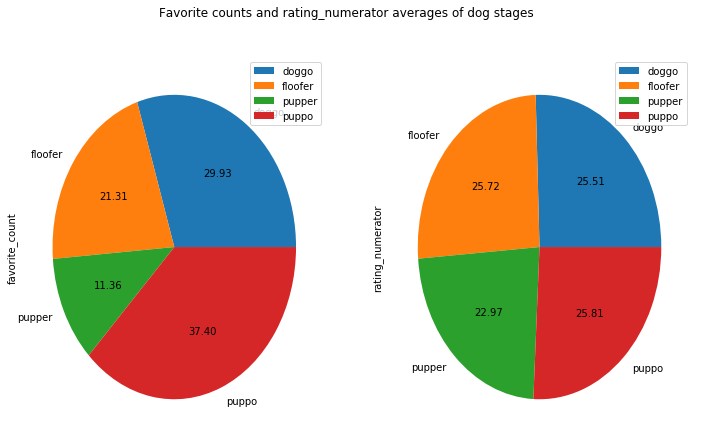

In [101]:
df_group.plot(kind='pie',subplots = True, figsize = (12,7), autopct = '%.2f',
              title = 'Favorite counts and rating_numerator averages of dog stages')